In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df_19 = pd.read_csv("survey_results_public_2019.csv")
df = pd.read_csv("survey_results_public_2020.csv")

In [25]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [26]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedComp"]]
df = df.rename({"ConvertedComp": "Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN


In [27]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0


In [29]:
df = df.dropna()     #remove missing value
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [30]:
df = df[df["Employment"] == "Employed full-time"]
df = df.drop("Employment", axis=1)

In [31]:
df['Country'].value_counts()

United States     7569
India             2425
United Kingdom    2287
Germany           1903
Canada            1178
                  ... 
Andorra              1
San Marino           1
Monaco               1
Yemen                1
Belize               1
Name: Country, Length: 154, dtype: int64

In [32]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [33]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Other                 8549
United States         7569
India                 2425
United Kingdom        2287
Germany               1903
Canada                1178
Brazil                 991
France                 972
Spain                  670
Australia              659
Netherlands            654
Poland                 566
Italy                  560
Russian Federation     522
Sweden                 514
Name: Country, dtype: int64

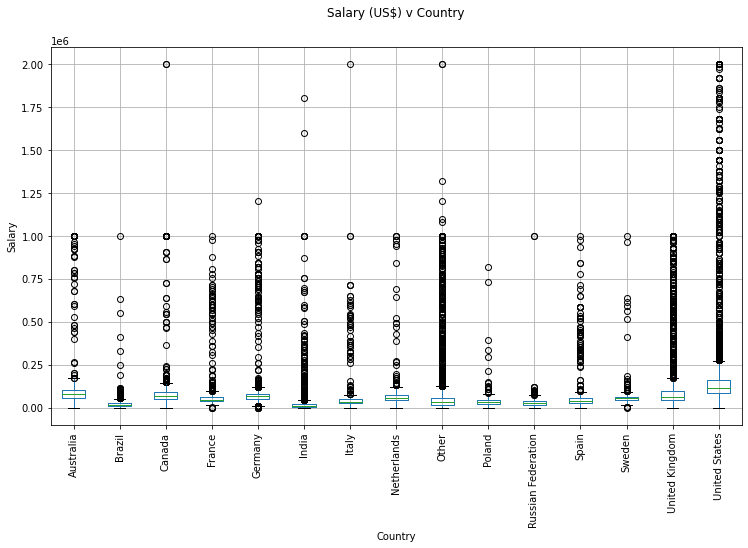

In [34]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [41]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']

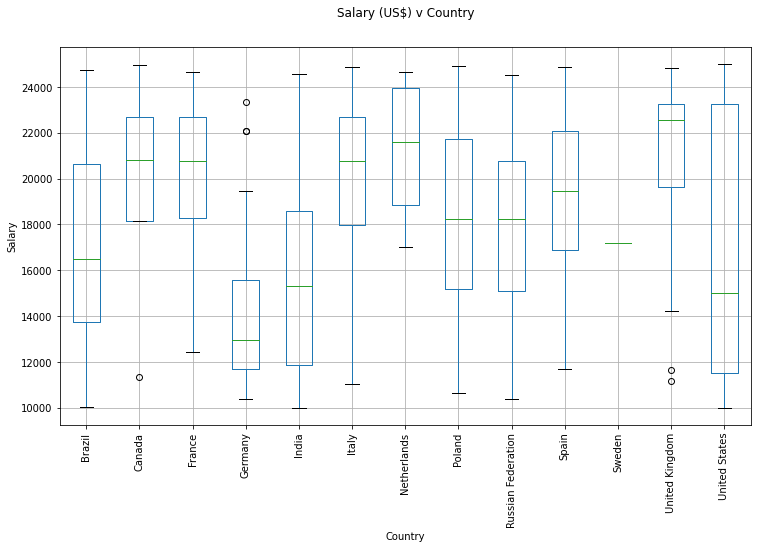

In [42]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [43]:
df["YearsCodePro"].unique()

array(['7', '15', '2', '3', '9', '11', '10', '4', '1', '14', '6', '20',
       '5', '37', 'Less than 1 year', '8', '26', '21', '13', '23', '18',
       '19', '12', '17', '24', '25', '16', '33', '31', '27', '22', '30',
       'More than 50 years', '28'], dtype=object)

In [44]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [46]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [47]:
df["EdLevel"].unique()

array(['Less than a Bachelors', 'Bachelor’s degree', 'Post grad',
       'Master’s degree'], dtype=object)

In [48]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()
#le.classes_

array([1, 0, 3, 2])

In [49]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([ 9,  0,  4, 11,  2,  5,  7, 12,  3,  6,  8,  1, 10])

In [50]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [55]:
y_pred = dec_tree_reg.predict(X)

In [56]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$3,370.33


In [63]:
X = np.array([["United States", 'Bachelor’s degree', 4 ]])

In [64]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X = X.astype(float)
X

array([[12.,  0.,  4.]])

In [66]:
y_pred = dec_tree_reg.predict(X)
y_pred

array([14500.])

In [69]:
import pickle
data = {"model": dec_tree_reg, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)